# Ancora sulla rappresentazione di tabelle in Python

Ricordiamo che, durante la lezione precedente, abbiamo convenuto che uno dei metodi migliori per rappresentare tabelle in Python è tramite una lista, i cui elementi sono le righe della matrice, a sua volta rappresentate come liste.

Ad esempio, la tabella
```
2  3  4  9
6 -1  0  3
1  1 -3  4
```
la si può rappresentare come segue:

In [1]:
l = [
    [2,  3,  4, 9],
    [6, -1,  0, 3],
    [1,  1, -3, 4]
]

Si noti che la divisione dell'istruzione di assegnamento in righe è solo per comodità di lettura, potrebbe stare tutto in una riga come segue:

In [2]:
l = [ [2,  3,  4, 9], [6, -1,  0, 3], [1,  1, -3, 4] ]

Gli elementi della matrice `l` sono le righe della tabella:

In [3]:
# riga n. 1 (cioè seconda) riga della tabella
l[1]

[6, -1, 0, 3]

In [4]:
# elemento della riga n.1 e colonna n. 2
l[1][2]

0

La volta scorsa abbiamo visto una funzione che esegue la somma di tutti i numeri di una tabella rappresentata in questo modo. Questa funzione prende come parametri anche il numero di righe e colonne.

In [35]:
def somma_tabella(l, num_righe, num_colonne):
    """
    Se l è una tabella con numero di righe e colonne specificato nei
    parametri, restituisce la somma di tutti i numeri in essa presenti.
    """
    somma = 0
    # il primo for scorre tutti i numeri di riga
    for i in range(num_righe):
        # il secondo for scorre tutti i numeri di colonna
        for j in range(num_colonne):
            somma += l[i][j]
    return somma

In [6]:
somma_tabella(l, 3, 4)

29

Tuttavia, passare esplicitamente il numero di righe e di colonne non è necessario. Infatti, il numero di righe coincide con il numero di elementi di `l`, e quindi lo si può ottenere come `len(l)`, mentre il numero di colonne è uguale al numero di elementi di una delle righe, e quindi lo si può ottenere come `len(l[0])`.

In [7]:
# Numero di elementi di l, corrispondenti al numero di righe della tabella
len(l)

3

In [8]:
# Prima riga della tabella l
l[0]

[2, 3, 4, 9]

In [9]:
# Numero di elementi della prima riga della tabella, ovvero numero di colonne
len(l[0])

4

Notare che invece di `len(l[0])` posso usare `len(l[1])`, `len(l[2])` o qualunque altro numero di riga esistente.

In [10]:
# restituisce comunque il numero di colonne della tabella
len(l[1])

4

In [11]:
# non funziona perché la tabella non ha un numero di righe sufficienti
len(l[10])

IndexError: list index out of range

Riscriviamo quindi la funzione in modo che prenda come parametro solo la tabella `l`.

In [36]:
def somma_tabella2(l):
    """
    Se l è una tabella restituisce la somma di tutti i numeri in essa presenti.
    """
    somma = 0
    # il primo for scorre tutti i numeri di riga
    for i in range(len(l)):
        # il secondo for scorre tutti i numeri di colonna
        for j in range(len(l[0])):
            somma += l[i][j]
    return somma

In [13]:
somma_tabella2(l)

29

## Tabelle frastagliate (o seghettate)

Usando questa rappresentazione con le liste, è possibile rappresentare facilmente tabelle in cui il numero di colonne è diverso per ogni riga. Supponiamo infatti di voler memorizzare i voti che hanno preso alcuni studenti durante la loro carriera accademica. È ovvio che studenti diversi possono aver superato un numero di esami diverso, per cui la tabella in questione potrebbe essere qualcosa di simile a questa:
```
Studente A: 28 29
Studente B: 20 22 18 27 23
Studente C:
```
È possibile rappresentare questi voti nel seguente modo:

In [14]:
l_frastagliata = [
    [28, 29],
    [20, 22, 18, 27, 23],
    []
]

Tabelle di questo tipo si chiamato taballe frastagliate o seghettate, in inglese *jagged array*. Ovviamente in un tabella di questo tipo, il fatto che esista l'elemento nella riga i colonna j, non ci assicura che esista l'elemento in colonna j per una riga diversa. Ad esempio:

In [16]:
l_frastagliata[1][3]

27

In [17]:
l_frastagliata[0][3]

IndexError: list index out of range

Se noi proviamo ad eseguire `somma_tabella` su `l_frastagliata` otteniamo un errore, perché il numero di colonne è preso uguale al numero di elementi della prima riga della tabella (ovvero 2), ma la terza riga non ha due elementi (anzi, non ne ha proprio nessuno).

In [18]:
somma_tabella2(l_frastagliata)

IndexError: list index out of range

Per poter lavorare sulle tabella frastagliate dobbiamo stare attenti che quando lavoriamo sulla riga i-esima dobbiamo considera la lunghezza proprio di quella riga, perché tutte le righe hanno lunghezza diversa. Fortunatamente, è facile modificare `somma_tabella` per farla funzionare su tabelle frastagliate: basta rimpiazzare `len(l[0])`, che determina la lunghezza della prima riga, con `len(l[i])` che restituisce la lunghezza della riga corrente.

In [37]:
def somma_tabella2_bis(l):
    """
    Se l è una tabella restituisce la somma di tutti i numeri in essa presenti.
    """
    somma = 0
    for i in range(len(l)):
        # uso len(l[i]) in modo che considero il numero di colonne corrette per la riga i
        for j in range(len(l[i])):
            somma += l[i][j]
    return somma

La nuova versione funziona correttamente sia con `l` che con `l_frastagliata`.

In [38]:
somma_tabella2_bis(l)

29

In [39]:
somma_tabella2_bis(l_frastagliata)

167

## Estrazione diretta degli elementi della tabella

Sappiamo che per scorrere una lista con `for` possiamo estrarre le posizioni della lista (con `for i in range(len(l))`) o direttamente gli elementi della lista (con `for  in l`). Nei programmi precedenti abbiamo usato il primo tipo di `for`, ora usiamo il secondo.

In [40]:
def somma_tabella3(l):
    """
    Se l è una tabella restituisce la somma di tutti i numeri in essa presenti.
    """
    somma = 0
    # il primo for scorre tutte le righe
    for riga in l:
        # il secondo for scorre tutti gli elementi di riga
        for elemento in riga:
            somma += elemento
    return somma

In [41]:
somma_tabella3(l)

29

In [42]:
somma_tabella3(l_frastagliata)

167

Segue un esempio di esecuzione passo passo di questa funzione:

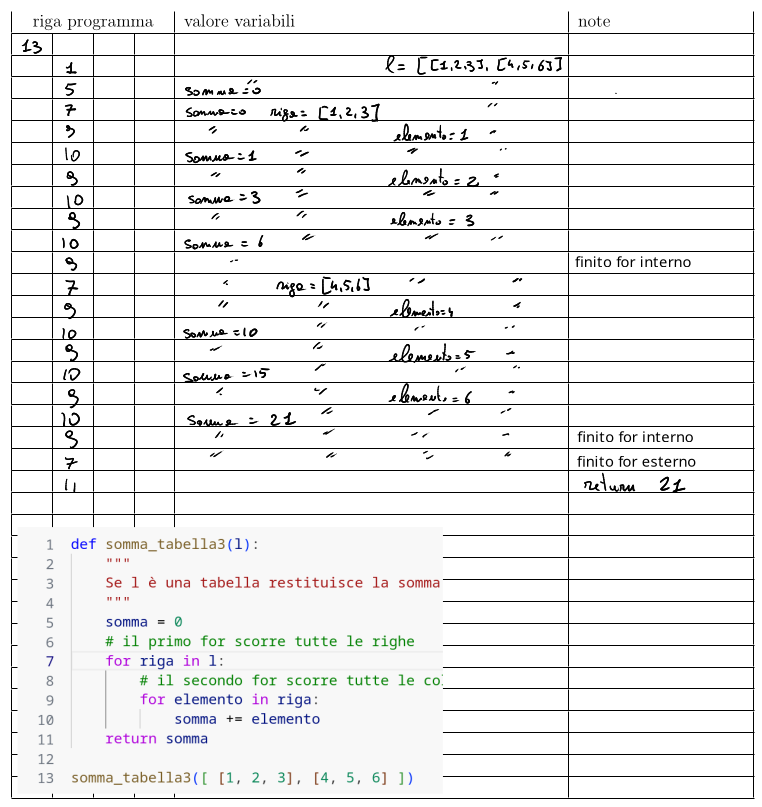

## Un altro esercizio

Consideriamo ora un problema differente: abbiamo un tabella di numeri, frastagliata o meno, e vogliamo calcolare la somma di tutti i numeri ma separatamente riga per riga, e restituire i risultati in una lista.

Ad esempio, data la tabella
```
1  2  3
4  5  6
```
vogliamo ottenere la lista `[6, 15]` dove `6` è la somma della prima riga della tabella e `15` la somma della seconda riga. Una possibile soluzione è questa.

In [59]:
def somma_righe(l):
    # La variabile risultato conterrà il risultato da restituire. All'inizio è vuota ma
    # verrà riempita mano a mano che prenderemo in considerazione le righe della tabella l.
    risultato = [ ]
    # Scorriamo i numeri di riga della tabella. Per ogni riga dovremo calcolare la somma
    # degli elementi e mettere la somma nella lista risultato.
    for i in range(len(l)):
        # Inizializziamo a 0 la variabile che conterrà la somma degli elementi della riga i.
        somma = 0
        # Scorriamo i numeri di colonna della riga i
        for j in range(len(l[i])):
            # Aggiorniamo somma con il valore nella riga i colonna j
            somma += l[i][j]
        # A questo punto somma contiene la somma degli elementi nella riga i, e mettiamo
        # questo valore in risultato
        risultato.append(somma)
    return risultato

In [44]:
somma_righe([[ 1,2,3], [4, 5, 6]])

[6, 15]

In [47]:
# Funziona anche su tabelle frastagliate
somma_righe([ [1], [2,3], [10, 20, 30] ])

[1, 5, 60]

Segue un esempio di esecuzione passo passo di questa funzione:

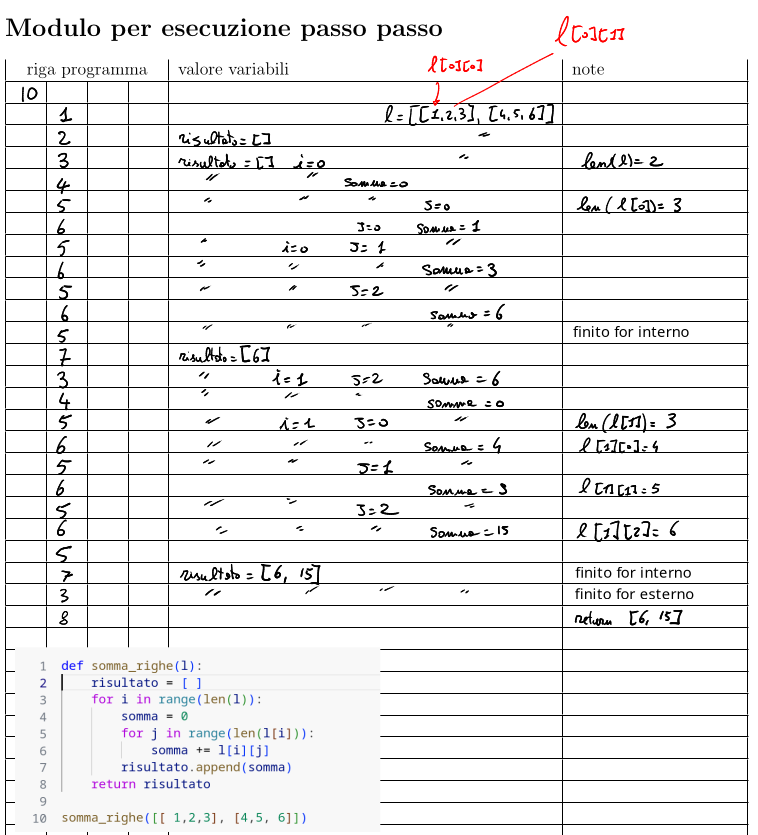

Vediamo qualche variante della funzione `somma_righe`. Prima di tutto, una versione che estrae direttamente gli elementi delle tabella invece che gli indici di riga e colonna.

In [50]:
def somma_righe2(l):
    risultato = [ ]
    for riga in l:
        somma = 0
        for elemento in riga:
            somma += elemento
        risultato.append(somma)
    return risultato

In [51]:
somma_righe2([ [1], [2,3], [10, 20, 30] ])

[1, 5, 60]

Ora una versione che invece di inizializzare `risultato` alla lista vuota, la inizializza ad una lista della lunghezza corretta ma piena di 0, che poi vengono modificati durante l'esecuzione.

In [55]:
def somma_righe3(l):
    # La lunghezza della lista risultato è uguale al numero di righe di l
    risultato = [ 0 ] * len(l)
    for i in range(len(l)):
        # Non ho bisogno della variabile somma, posso utilizzare direttamente
        # risultato[i] per accumulare le somme.
        for j in range(len(l[i])):
            risultato[i] += l[i][j]
    return risultato

In [56]:
somma_righe3([ [1], [2,3], [10, 20, 30] ])

[1, 5, 60]

Infine una soluzione che non vi spiego per nulla, consideratelo un esempio di quanto le cose possono essere scritte in maniera più compatta conoscendo a fondo il linguaggio. In particolare, qui usiamo una caratteristica di Python nota come [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp) e che non fa parte del programma del corso.

In [57]:
def somma_righe4(l):
    return [ sum(riga) for riga in l ]

In [58]:
somma_righe4([ [1], [2,3], [10, 20, 30] ])

[1, 5, 60]